# Exploratory Data analysis on IPL dataset

# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request as p

C:\Users\pavan\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load data

In [10]:
import os
os.chdir('D:\Spark datasets')

In [11]:
df=pd.read_csv('matches.csv')
df1=pd.read_csv('deliveries.csv')

In [12]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Total Matches played and total matches and toss being won and lost.

In [15]:
team_stats = pd.DataFrame({'Total Matches played': df.team1.value_counts() + df.team2.value_counts(), 'Total won': df.winner.value_counts(), 'Toss won': df.toss_winner.value_counts(), 
                          'Total lost': ((df.team1.value_counts() + df.team2.value_counts()) - df.winner.value_counts())})
team_stats = team_stats.reset_index()
team_stats.rename(columns = {'index':'Teams'}, inplace = True)
winloss = team_stats['Total won'] / team_stats['Total Matches played']
winloss = pd.DataFrame({'Winloss Ratio': team_stats['Total won'] / team_stats['Total Matches played']})
winloss= winloss.round(2)
team_stats = team_stats.join(winloss)

team_stats

,Teams,Total Matches played,Total won,Toss won,Total lost,Winloss Ratio
0,Chennai Super Kings,164,100,89,64,0.61
1,Deccan Chargers,75,29,43,46,0.39
2,Delhi Capitals,16,10,10,6,0.62
3,Delhi Daredevils,161,67,80,94,0.42
4,Gujarat Lions,30,13,15,17,0.43
5,Kings XI Punjab,176,82,81,94,0.47
6,Kochi Tuskers Kerala,14,6,8,8,0.43
7,Kolkata Knight Riders,178,92,92,86,0.52
8,Mumbai Indians,187,109,98,78,0.58
9,Pune Warriors,46,12,20,34,0.26


### Maximum Toss Won

Text(0.5, 1.0, 'Maximum Toss Won')

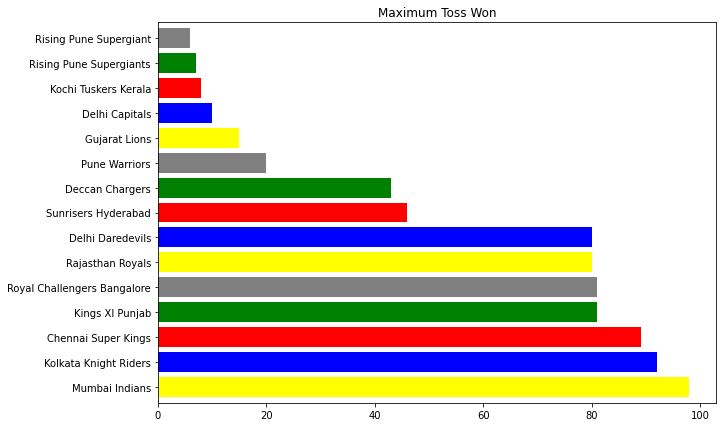

In [16]:
plt.subplots(figsize=(10,7))
ax=df['toss_winner'].value_counts().plot.barh(width=0.8,color=['yellow', 'blue','red','green','grey'])
plt.title("Maximum Toss Won")

### Both Toss and match WON 

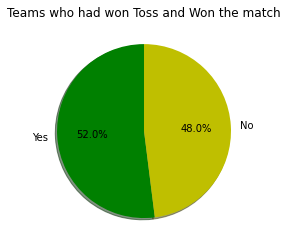

In [17]:
Tosswin_matchwin=df[df['toss_winner']==df['winner']]
slices=[len(Tosswin_matchwin),(len(df)-len(Tosswin_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','y'])
plt.title("Teams who had won Toss and Won the match")
fig = plt.gcf()
fig.set_size_inches(4,4)
plt.show()
#The Chances of the team winning, if it has won the toss are reasonably high.
#Toss favours to the victory of team

### Plotting of team's on basis of matches won

Text(0, 0.5, 'Wins')

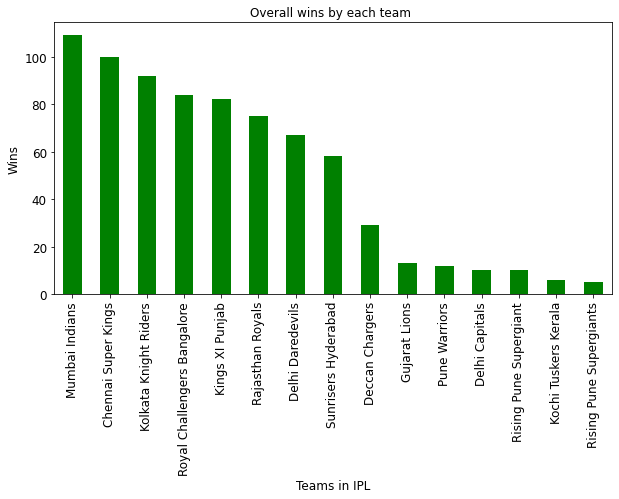

In [18]:
Total_win = df.winner.value_counts()
ax = Total_win.plot(kind='bar',title ="Overall wins by each team ",figsize=(10,5), fontsize=12,color='green')
ax.set_xlabel("Teams in IPL",fontsize=12)
ax.set_ylabel("Wins",fontsize=12)

### Shape of dataset

In [19]:
df.shape

(756, 18)

In [20]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


### Description of dataset

In [21]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


#### The number of matches in the dataset's

In [22]:
df['id'].max()

11415

In [23]:
df1['match_id'].max()

11415

### IPL Seasons in the dataset

In [24]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [25]:
len(df['season'].unique())

12

### Winner in each Season 

In [26]:
winner_each_season = df.drop_duplicates(subset=['season'],keep='last')[['season', 'winner']].reset_index(drop=True)
winner_each_season

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


### Most wins

<AxesSubplot:title={'center':'Most wins'}>

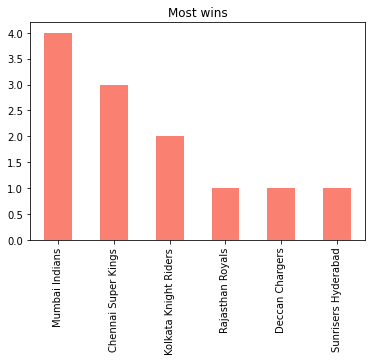

In [27]:
winner_each_season.winner.value_counts().plot(kind='bar',orientation='vertical',title='Most wins',color='salmon')

<AxesSubplot:xlabel='winner'>

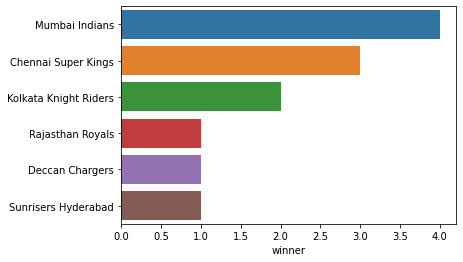

In [28]:
data = winner_each_season.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

### Team info that won by maxium run's

In [29]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

   ### Each team comparison :

C:\Users\pavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\pavan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


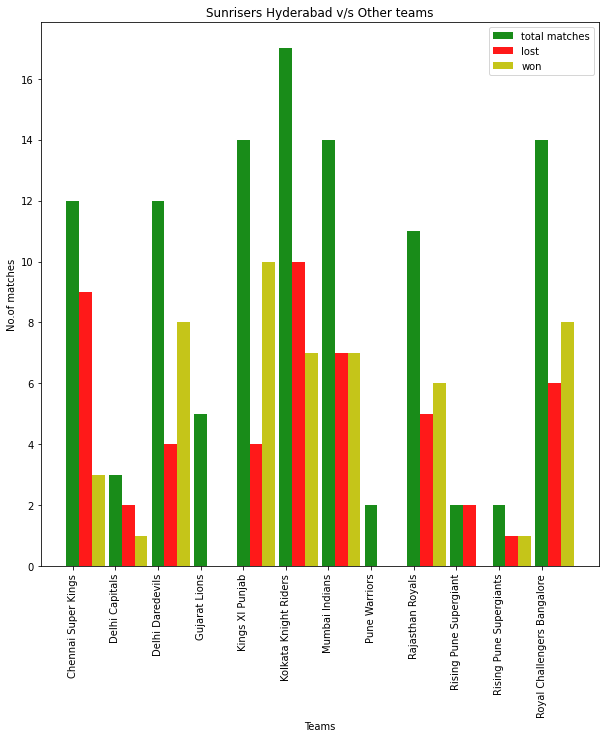

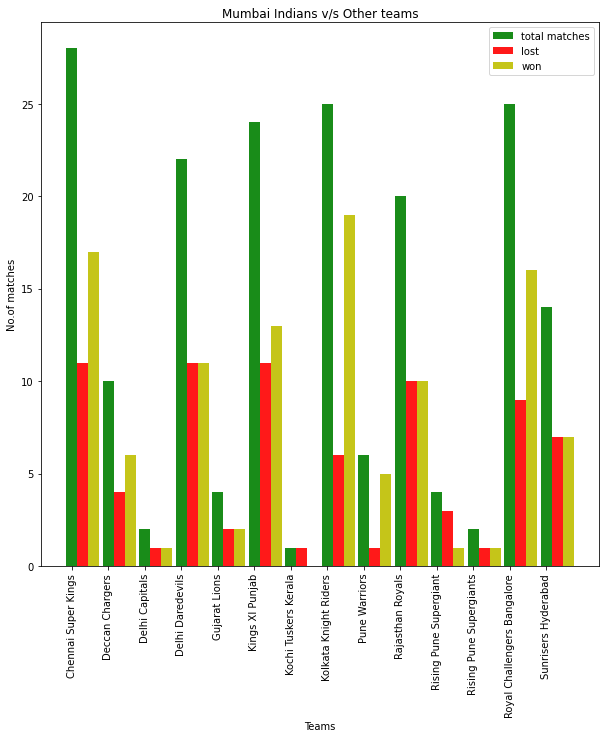

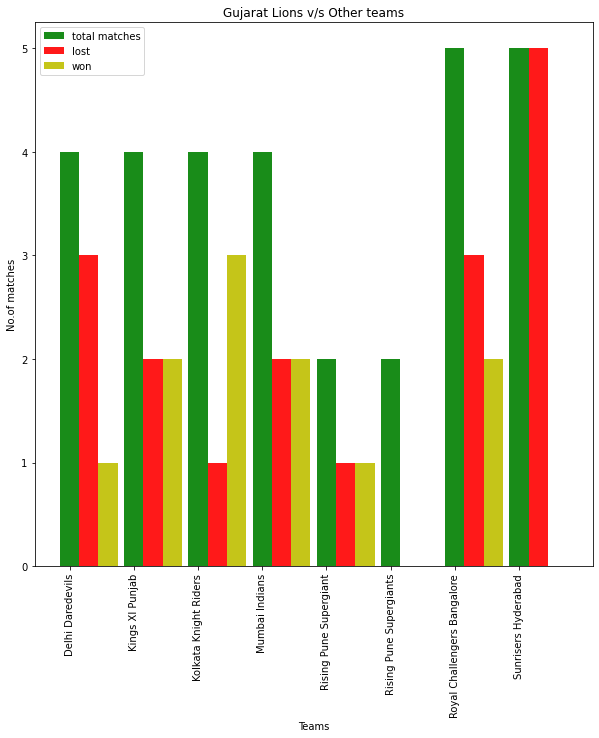

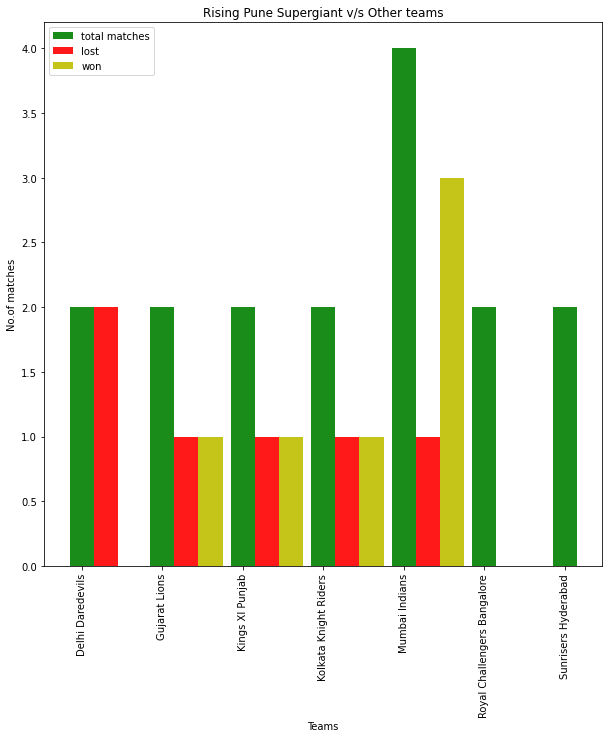

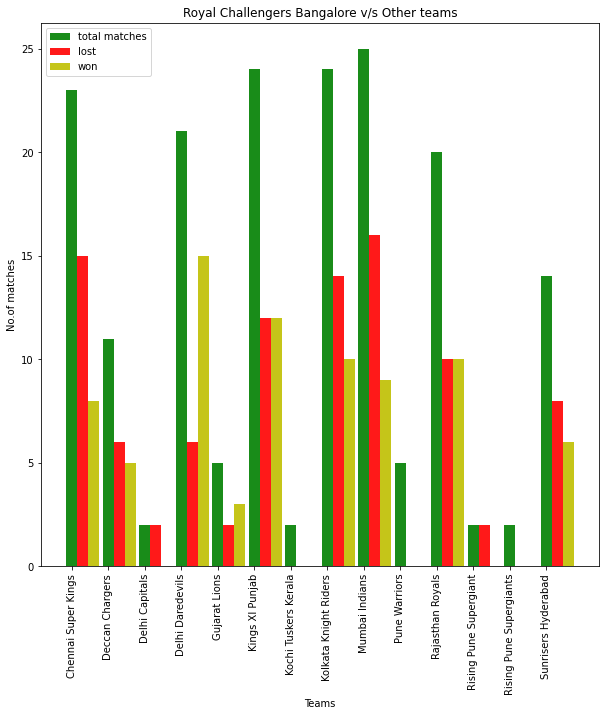

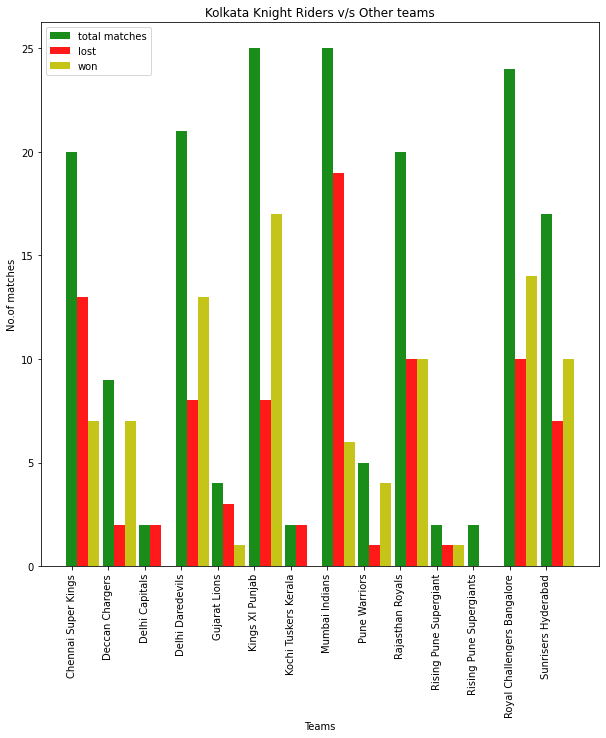

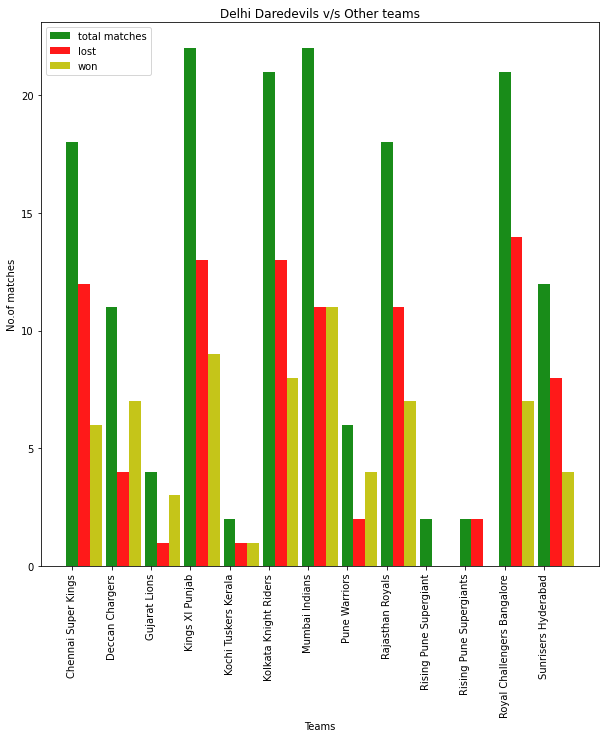

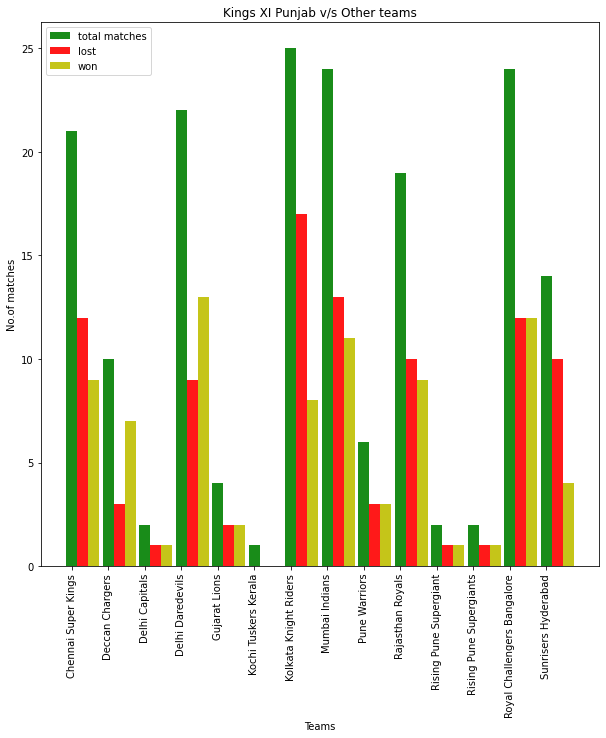

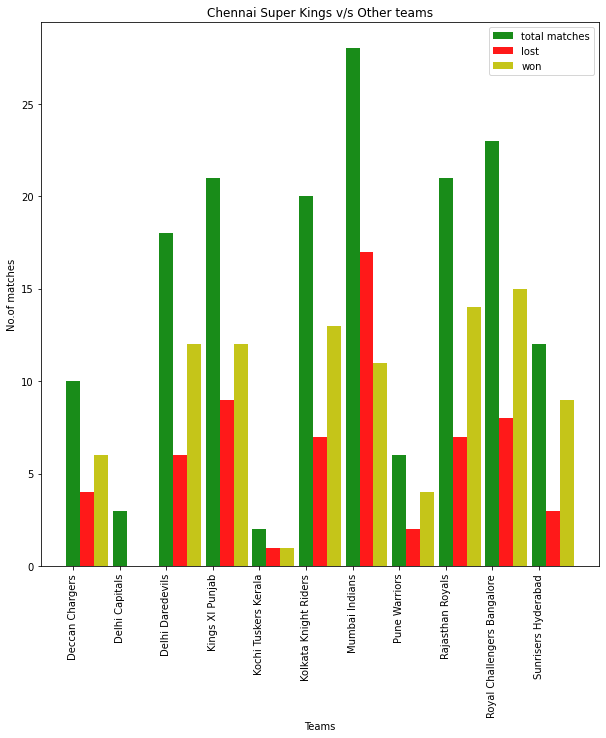

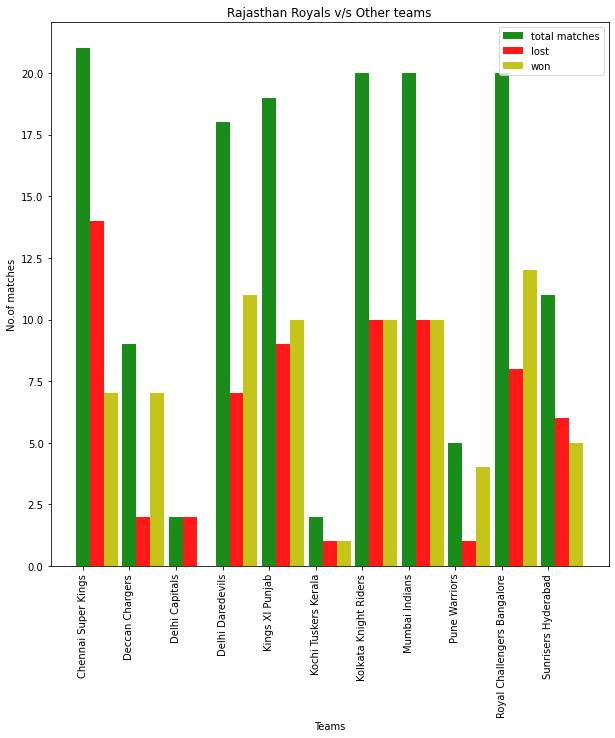

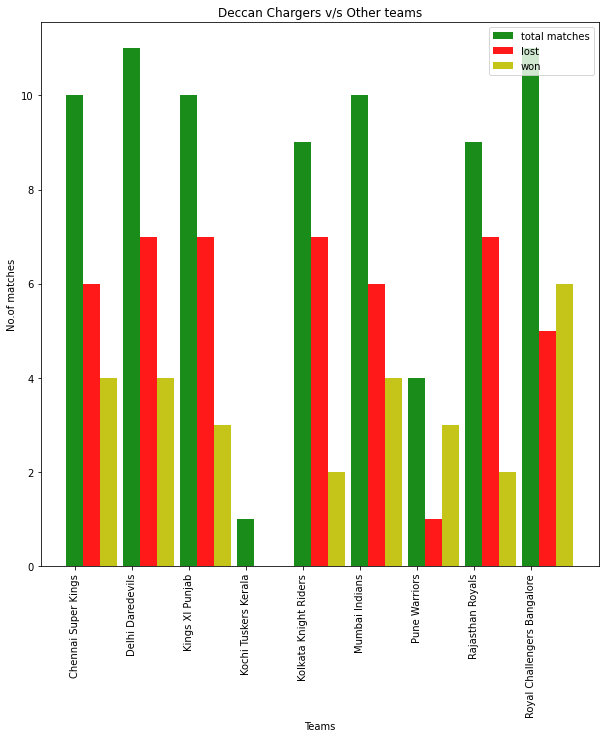

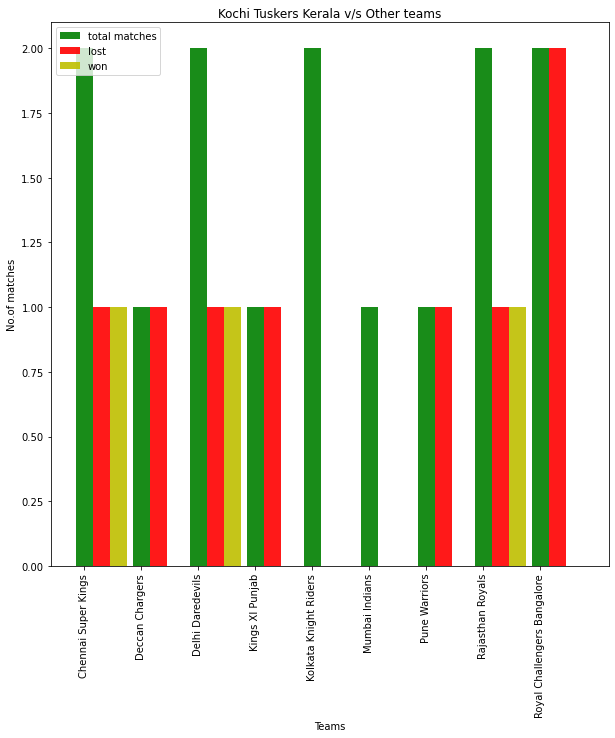

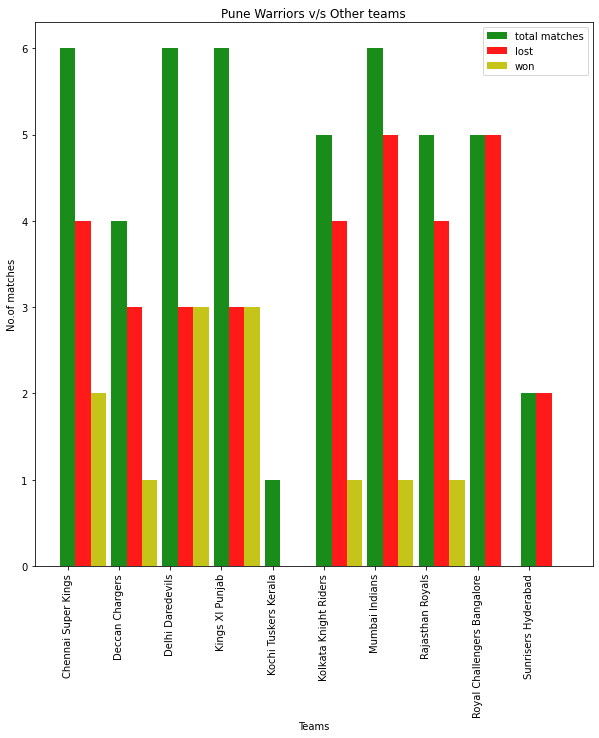

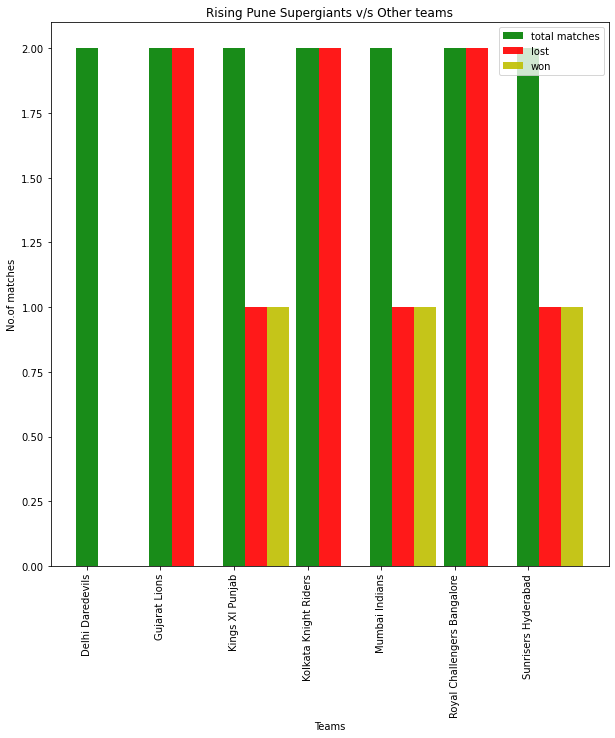

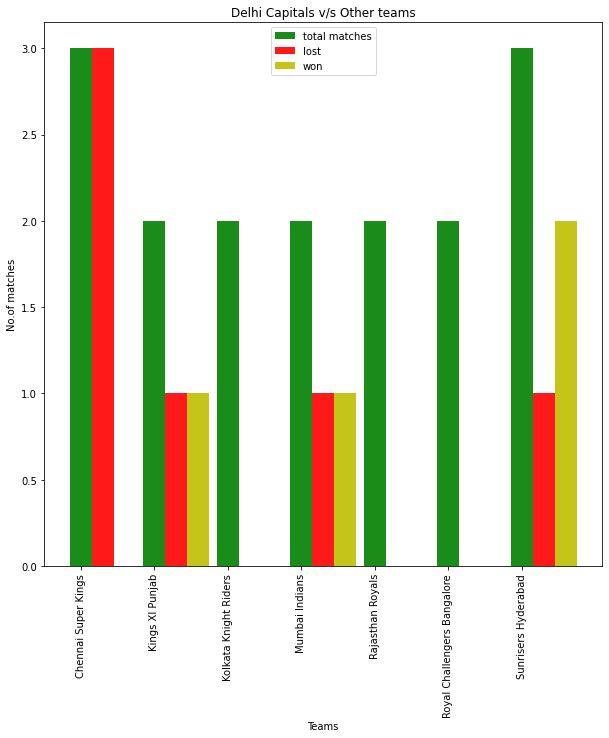

In [30]:
for i in df["team1"].unique():
    #print(i)
    new_df=df.copy()
    for j in range(len(df)):
        if (new_df["team1"][j] != i and new_df["team2"][j] == i):
            a=new_df["team1"][j]
            new_df["team1"][j]=new_df["team2"][j]
            new_df["team2"][j]=a
        elif(new_df["team1"][j] != i and new_df["team2"][j] != i):
            new_df=new_df.drop([j],axis=0)
    new_df["won"]=(new_df["winner"]==i).astype(int)
    #new_df.to_csv(i+'.csv')
    won=pd.DataFrame({'Total':new_df.team2.value_counts(),'won': new_df.winner.value_counts()})
    won=won.drop(index=i)
    fig,ax=plt.subplots(figsize=(10,10))
    bar_width = 0.3
    opacity = 0.9
    index=np.arange(len(won))
    ax.bar(index,won['Total'],bar_width, alpha=opacity,color='g',label='total matches')
    ax.bar(index+bar_width,won['won'],bar_width, alpha=opacity,color='r',label='lost')
    ax.bar(index+2*bar_width,won['Total']-won['won'],bar_width, alpha=opacity,color='y',label='won')
    ax.legend()
    ax.set_xlabel('Teams')
    ax.set_ylabel('No.of matches')
    ax.set_title(i+' v/s Other teams')
    plt.xticks(ticks=index,labels=won.index,rotation=90)
    plt.show()

### Team winning by maxium runs name

In [31]:
df.iloc[df['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

### Team winning by maxium wickets name

In [32]:
df.iloc[df['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

### Team winning by minimum runs name

In [33]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

### Team winning by minimum wickets name

In [35]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

#### Observation:

Mumbai Indians is the team which won by maximum and minimum runs Kolkata Knight Riders is the team which won by maximum and minimum wickets


#### Season having most number of matches

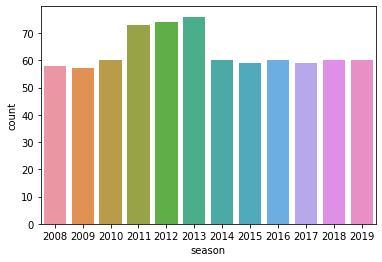

In [36]:
sns.countplot(x='season', data=df)
plt.show()

### TOP player

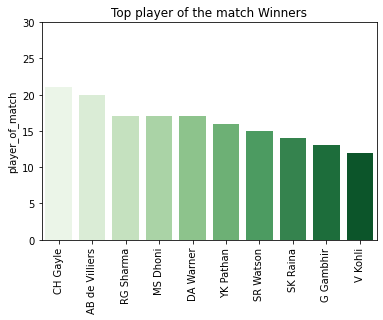

In [37]:
top_players = df.player_of_match.value_counts()[:10]

fig, ax = plt.subplots()
ax.set_ylim([0,30])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="Greens");
plt.show()

### Batsmen overview

In [38]:
batsmen = df1.groupby("batsman").agg({'ball': 'count','batsman_runs': 'sum'})
batsmen.rename(columns={'ball':'balls', 'batsman_runs': 'runs'}, inplace=True)
batsmen = batsmen.sort_values(['balls','runs'], ascending=False)
batsmen['batting_strike_rate'] = batsmen['runs']/batsmen['balls'] * 100
batsmen['batting_strike_rate'] = batsmen['batting_strike_rate'].round(2)
batsmen.head(10)

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [39]:
#utility function used later
def trybuild(lookuplist, buildlist):
    alist = []
    for i in buildlist.index:
        try:
            #print(i)
            alist.append(lookuplist[i])
            #print(alist)
        except KeyError:
            #print('except')
            alist.append(0)
    return alist

In [40]:
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman

,balls,runs,batting_strike_rate
batsman,,,
V Kohli,4211,5434,129.04
SK Raina,4044,5415,133.90
RG Sharma,3816,4914,128.77
S Dhawan,3776,4632,122.67
G Gambhir,3524,4223,119.84
RV Uthappa,3492,4446,127.32
DA Warner,3398,4741,139.52
MS Dhoni,3318,4477,134.93
AM Rahane,3215,3850,119.75


In [41]:
alist = []
for r in df1.batsman_runs.unique():
    lookuplist = df1[df1.batsman_runs == r].groupby('batsman')['batsman'].count()
    batsmen[str(r) + 's'] = trybuild(lookuplist, batsmen)
    try:
        alist.append(lookuplist[r])
    except KeyError:
        alist.append(0)
TopBatsman = batsmen.sort_values(['balls','runs'], ascending=False)[:20]
TopBatsman.head(10)

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s
batsman,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0


In [42]:
#Build a dictionary of Matches player by each batsman
played = {}
def BuildPlayedDict(x):
    #print(x.shape, x.shape[0], x.shape[1])
    for p in x.batsman.unique():
        if p in played:
            played[p] += 1
        else:
            played[p] = 1

df1.groupby('match_id').apply(BuildPlayedDict)
import operator

In [43]:
TopBatsman['matches_played'] = [played[p] for p in TopBatsman.index]
TopBatsman['average']= TopBatsman['runs']/TopBatsman['matches_played']

TopBatsman['6s/match'] = TopBatsman['6s']/TopBatsman['matches_played']  
TopBatsman['6s/match'].median()

TopBatsman['4s/match'] = TopBatsman['4s']/TopBatsman['matches_played']  
TopBatsman['4s/match']
TopBatsman

,balls,runs,batting_strike_rate,0s,4s,1s,6s,3s,2s,5s,7s,matches_played,average,6s/match,4s/match
batsman,,,,,,,,,,,,,,,
V Kohli,4211,5434,129.04,1493,482,1741,191,11,293,0,0,169,32.153846,1.130178,2.852071
SK Raina,4044,5415,133.90,1381,495,1695,195,11,266,1,0,189,28.650794,1.031746,2.619048
RG Sharma,3816,4914,128.77,1390,431,1589,194,5,205,1,1,182,27.000000,1.065934,2.368132
S Dhawan,3776,4632,122.67,1455,526,1473,96,18,205,3,0,158,29.316456,0.607595,3.329114
G Gambhir,3524,4223,119.84,1351,492,1358,59,15,249,0,0,151,27.966887,0.390728,3.258278
RV Uthappa,3492,4446,127.32,1382,436,1295,156,13,206,4,0,170,26.152941,0.917647,2.564706
DA Warner,3398,4741,139.52,1254,459,1213,181,18,271,2,0,126,37.626984,1.436508,3.642857
MS Dhoni,3318,4477,134.93,1111,297,1383,207,14,304,0,2,170,26.335294,1.217647,1.747059
AM Rahane,3215,3850,119.75,1198,405,1308,74,15,214,1,0,132,29.166667,0.560606,3.068182


### Total runs by each batsmen

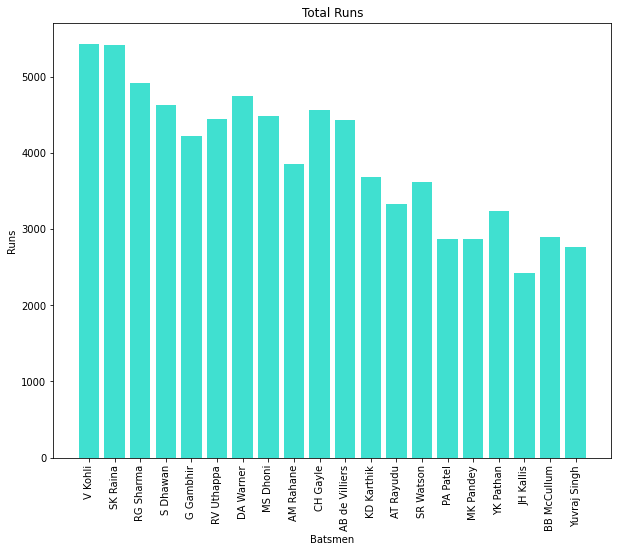

In [44]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['runs'],color='Turquoise')
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title('Total Runs')
plt.show()

### Each batsmen strike rate

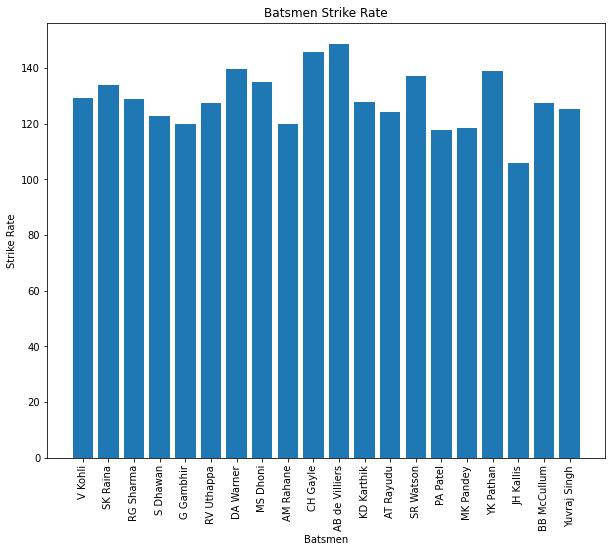

In [45]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBatsman)),TopBatsman['batting_strike_rate'])
plt.xticks(ticks=np.arange(len(TopBatsman)),labels=TopBatsman.index,rotation=90)
plt.xlabel('Batsmen')
plt.ylabel('Strike Rate')
plt.title('Batsmen Strike Rate')
plt.show()

It is an important factor for a batsman in an T20 league to maintain a good strike rate. AB de Villiers and CH Gayle have almost equal strike rates.

### Bowler information

In [46]:
bowler_wickets = df1.groupby('bowler').aggregate({'ball': 'count', 'total_runs': 'sum', 'player_dismissed' : 'count'})
bowler_wickets.columns = ['runs','balls','wickets']
TopBowlers = bowler_wickets.sort_values(['wickets'], ascending=False)[:20]
TopBowlers

,runs,balls,wickets
bowler,,,
SL Malinga,2974,3511,188
DJ Bravo,2711,3733,168
A Mishra,3172,3850,165
Harbhajan Singh,3451,4050,161
PP Chawla,3157,4153,156
B Kumar,2707,3264,141
R Ashwin,3016,3391,138
SP Narine,2600,2939,137
UT Yadav,2605,3640,136


In [47]:
TopBowlers['economy'] = TopBowlers['runs']/(TopBowlers['balls']/6)
TopBowlers = TopBowlers.sort_values(['economy'], ascending=True)[:20]
TopBowlers

,runs,balls,wickets,economy
bowler,,,,
UT Yadav,2605,3640,136,4.293956
R Vinay Kumar,2186,3043,127,4.310220
MM Sharma,1770,2457,99,4.322344
DJ Bravo,2711,3733,168,4.357353
PP Chawla,3157,4153,156,4.561040
YS Chahal,1841,2416,102,4.572020
RP Singh,1874,2417,100,4.652048
SR Watson,2137,2751,107,4.660851
A Nehra,1974,2537,121,4.668506


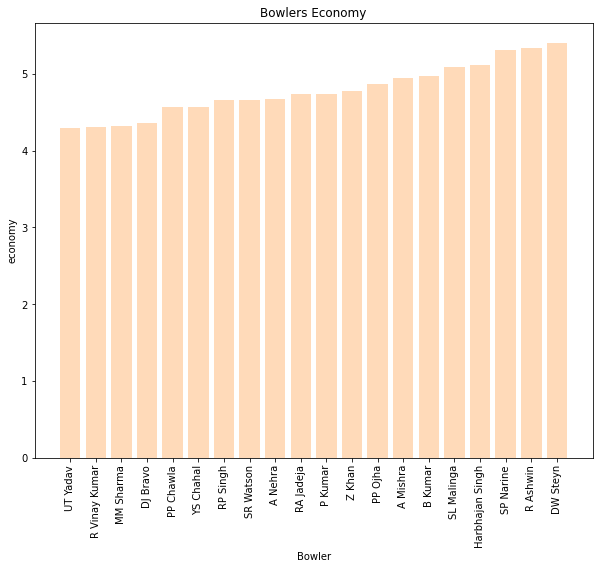

In [48]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['economy'],color='PeachPuff')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('economy')
plt.title('Bowlers Economy')
plt.show()

### Wickets taken by a bowler

Economy has to be low

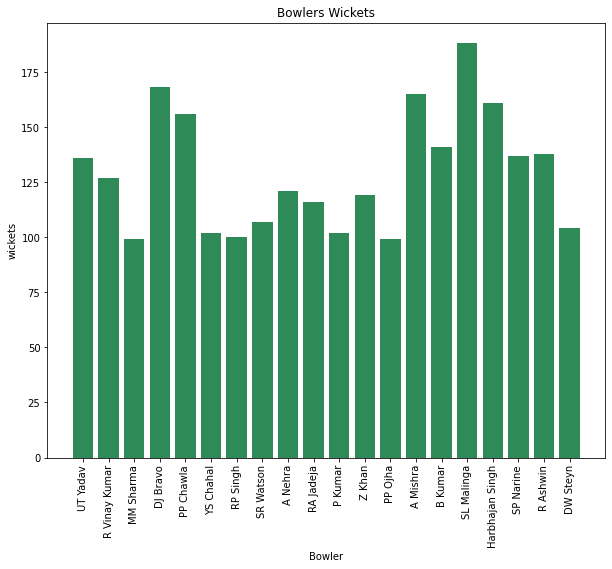

In [49]:
plt.figure(figsize=(10,8))
plt.bar(np.arange(len(TopBowlers)),TopBowlers['wickets'],color='SeaGreen')
plt.xticks(ticks=np.arange(len(TopBowlers)),labels=TopBowlers.index,rotation=90)
plt.xlabel('Bowler')
plt.ylabel('wickets')
plt.title('Bowlers Wickets')
plt.show()

# sweetviz Lib

In [50]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [65]:
import sweetviz as sv
deliveries_report = sv.analyze(df1)
deliveries_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [67]:
matches_report = sv.analyze(df)
matches_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Total no of wins by each team

In [66]:
Team_wins = df.winner.value_counts().reset_index()
Team_wins.columns = ['Team', 'Wins']
Team_wins.sort_values(by='Wins')
Team_wins

,Team,Wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


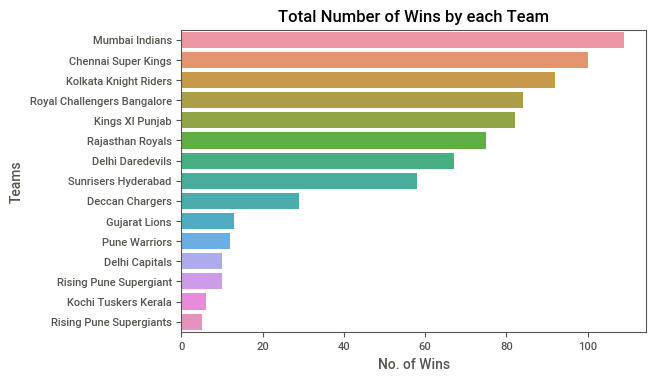

In [55]:
sns.barplot(y='Team', x='Wins', data=Team_wins, orient='h').set(title='Total Number of Wins by each Team', xlabel='No. of Wins', ylabel='Teams')
plt.show()

### Most Man Of The Match Awards

In [56]:
Top_MOM = df.player_of_match.value_counts().reset_index()
Top_MOM.columns = ['Player', 'Awards']
Top_MOM.sort_values(by='Awards')
Top_MOM

,Player,Awards
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
...,...,...
221,S Sreesanth,1
222,Ishan Kishan,1
223,EJG Morgan,1
224,DL Chahar,1


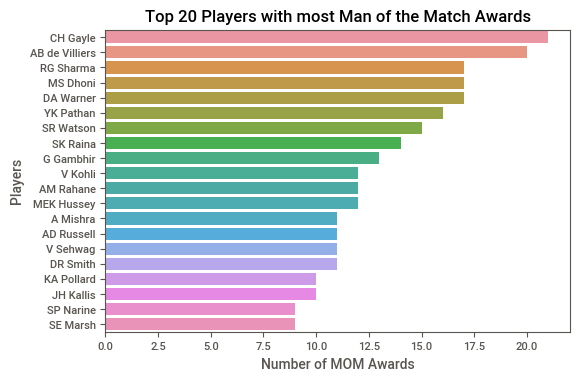

In [57]:
sns.barplot(y='Player', x='Awards', data=Top_MOM[0:20]).set(title='Top 20 Players with most Man of the Match Awards',
                                                            xlabel='Number of MOM Awards', ylabel='Players')
plt.show()

In [58]:
bats_20 = df1[['batsman', 'batsman_runs']]
bats_20 = bats_20.groupby(by='batsman').sum().sort_values(by='batsman_runs', ascending=False)
bats_20.reset_index(inplace=True)
bats_20.columns = ['Batsman', 'Total_Runs']
bats_20.head(10)

,Batsman,Total_Runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


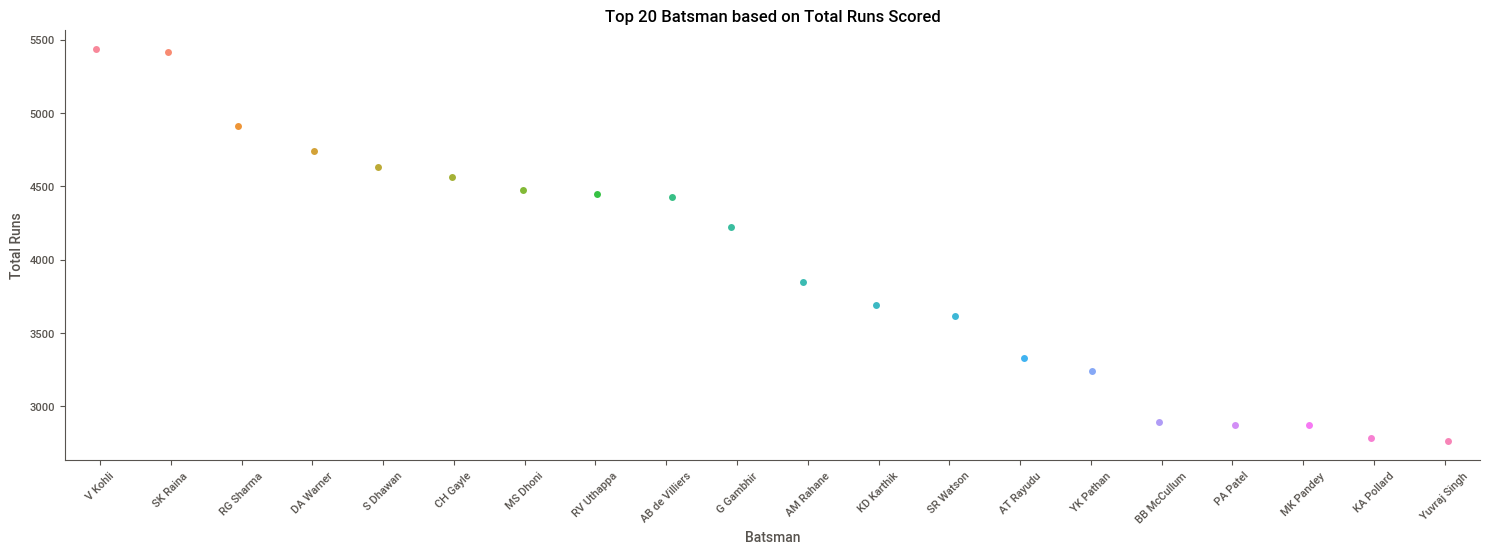

In [59]:
chart = sns.catplot(x='Batsman', y='Total_Runs', data=bats_20.head(20), orient='v', aspect=3)
chart.set_xticklabels(rotation=45)
chart.set(title='Top 20 Batsman based on Total Runs Scored', xlabel='Batsman', ylabel='Total Runs')
plt.show()

In [60]:
bowl_wkt = df1[['bowler', 'player_dismissed']].loc[(~df1['player_dismissed'].isna()) & 
                                                             (df1.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']))]
bowl_wkt = bowl_wkt.groupby(by='bowler').count().sort_values(by='player_dismissed', ascending=False)*6
bowl_wkt.reset_index(inplace=True)
bowl_wkt.columns = ['bowler', 'wickets']
bowl_wkt = bowl_wkt.head(20)

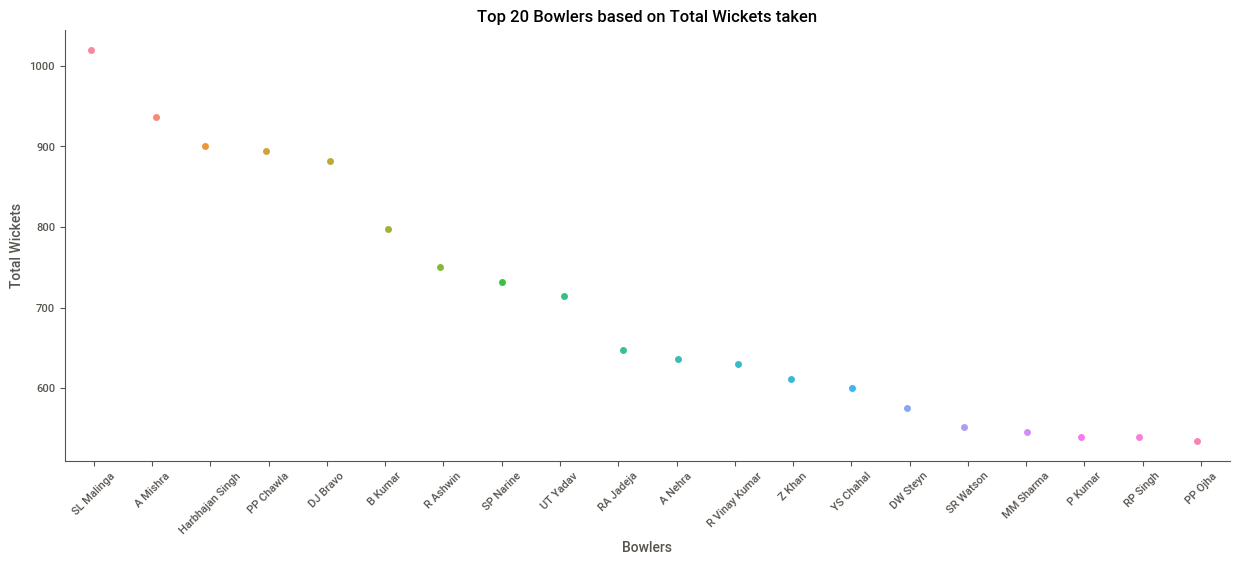

In [61]:
chart = sns.catplot(x='bowler', y='wickets', data=bowl_wkt, orient='v', aspect=2.5)
chart.set_xticklabels(rotation=45)
chart.set(title='Top 20 Bowlers based on Total Wickets taken', xlabel='Bowlers', ylabel='Total Wickets')
plt.show()

In [62]:
#Merging both the data's

ipl = pd.merge(right=df1, left=df, how='outer', left_on='id', right_on='match_id')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Orange Cap Winner

In [63]:
orange = ipl[['season', 'batsman', 'batsman_runs']].groupby(by=['season', 'batsman']).sum().reset_index().sort_values(by='batsman_runs', ascending=False)
orange
max_run = orange.groupby(by=['season'])['batsman_runs'].max().reset_index()
max_run
pd.merge(left=orange, right=max_run, how='right', on=['season', 'batsman_runs']).sort_values(by='season')

,season,batsman,batsman_runs
0,2008,SE Marsh,616
1,2009,ML Hayden,572
2,2010,SR Tendulkar,618
3,2011,CH Gayle,608
4,2012,CH Gayle,733
5,2013,MEK Hussey,733
6,2014,RV Uthappa,660
7,2015,DA Warner,562
8,2016,V Kohli,973
9,2017,DA Warner,641


### Purple cap winner

In [64]:
purple = ipl[['season', 'bowler', 'player_dismissed']].loc[~df1['player_dismissed'].isna() &
                                                          (df1.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']))
                                                          ]
purple = purple[['season', 'bowler', 'player_dismissed']].groupby(by=['season', 'bowler']).count().reset_index().sort_values(by='player_dismissed', ascending=False)
purple.columns = ['season', 'bowler', 'wickets']
max_wkt = purple.groupby(by=['season'])['wickets'].max().reset_index()
max_wkt.columns = ['season', 'wickets']
pd.merge(left=purple, right=max_wkt, how='right', on=['season', 'wickets']).sort_values(by='season')

,season,bowler,wickets
0,2008,Sohail Tanvir,22
1,2009,RP Singh,23
2,2010,PP Ojha,21
3,2011,SL Malinga,28
4,2012,M Morkel,25
5,2013,DJ Bravo,32
6,2014,MM Sharma,23
7,2015,DJ Bravo,26
8,2016,B Kumar,23
9,2017,B Kumar,26


# Conclusion :

SL Malinga and DJ Bravo are the leading wicket takers in this tournament.

### Best Pick for endorsement :

Batsmen : Virat kohli, SK Raina, CH Gayle, AB de Villiers, DA warner

Bowlers : UT Yadhav, DJ Bravo,SL, Malinga

Teams : MUMBAI INDIANS, CHENNAI SUPER KINGS, KOLKATA KNIGHT RIDERS